## Make plots of the distribution of mutations and duplications in the evolved strains

In [1]:
import json
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
with open("../Data/Mutation_data/Strain_to_genes.json") as infile:
    strain_to_genes = json.load(infile)
    
with open("../Data/Mutation_data/All_strains_to_mutations.json") as infile:
    strain_to_mutations = json.load(infile)

In [5]:
compound_order =['12PD', '23BD','GLUT', 'ADIP',  'PUTR', 'HMDA', 'IBUA', 'COUM', 'BUT',
       'OCTA', 'HEXA']

In [6]:
mut_df = pd.DataFrame({s: {m: 1 for m in strain_to_mutations[s]} for s in strain_to_genes}).fillna(0)
dup_df = mut_df[mut_df.index.str.startswith("DUP")]
mut_df = mut_df[~mut_df.index.isin(dup_df.index)]

duplication_lengths = dup_df.index.map(lambda x: int(x.split("_")[0][4:].split("-")[1].replace(",", "")))
dup_df = (dup_df.transpose() * duplication_lengths).transpose()

plot_df = pd.DataFrame({"Mutations": mut_df.sum(0), "Duplications": dup_df.sum(0)})
plot_df.index.name = "Strain"
plot_df["Compound"] = plot_df.index.map(lambda x: x.split("-")[0][:-1])
plot_df = plot_df[plot_df["Compound"].isin(compound_order)]
plot_df = plot_df.reindex(sorted(plot_df.index, key=lambda x: compound_order.index(plot_df["Compound"].get(x))))

In [31]:
for i in dup_df.index:
    for j in dup_df.columns:
        if dup_df.loc[i,j]!=0:
            print (j, i)


HMDA2-1 DUP-3583478-671_3.2
HMDA2-8 DUP-19838-678_3.3
HMDA3-5 DUP-3583474-691_3.0
HMDA3-5 DUP-19839-678_3.0
HMDA3-6 DUP-3583475-686_4.1
HMDA5-4 DUP-3583465-704_4.1
HMDA5-4 DUP-19817-706_4.1
HMDA5-5 DUP-19821-692_4.2
HMDA5-5 DUP-3583468-703_4.2
PUTR6-10 DUP-3583480-695_3.6
PUTR6-10 DUP-19816-693_3.5
PUTR7-7 DUP-1432298-1,738_2.4
PUTR7-9 DUP-1633247-1,357_2.5
PUTR7-9 DUP-1432279-2,590_2.4
PUTR7-9 DUP-1498553-613_1.9
PUTR7-9 DUP-1413124-460_2.0
PUTR8-3 DUP-683270-2,122_2.0
12PD4-6 DUP-3720632-103,691_2.2
12PD6-9 DUP-2395428-9,541_2.2
12PD6-9 DUP-2413743-8,889_2.1
12PD6-9 DUP-2350754-10,321_2.1
12PD6-9 DUP-2347284-2,132_2.1
12PD6-9 DUP-2366010-14,631_2.2
12PD6-9 DUP-2362219-2,384_2.0
12PD6-9 DUP-2407662-4,646_2.1
12PD6-9 DUP-2423685-7,326_2.1
12PD6-9 DUP-2390260-2,802_2.3
23BD4-3 DUP-3583479-674_2.4
23BD4-4 DUP-2558136-7,644_1.9
23BD4-4 DUP-2394977-4,208_1.8
23BD4-4 DUP-2682720-17,736_2.0
23BD4-4 DUP-3583497-687_2.5
23BD4-4 DUP-2827738-17,473_1.9
23BD4-4 DUP-2290555-3,309_1.8
23BD4-4 DUP-2

IBUA7-9 DUP-3695999-6,448_2.0
IBUA7-9 DUP-3654802-2,511_2.0
IBUA7-9 DUP-3715731-1,935_2.1
IBUA7-9 DUP-3643819-6,708_1.9
IBUA7-9 DUP-3709725-3,890_1.9
IBUA7-9 DUP-3679236-2,119_2.0
IBUA7-9 DUP-3662813-10,854_2.1
IBUA7-9 DUP-3619332-8,774_2.3
IBUA7-9 DUP-3740169-4,830_1.9
BUT4-4 DUP-3583450-702_3.4
BUT4-4 DUP-19818-697_3.4
BUT5-2 DUP-3583467-694_3.3


In [7]:
plot_df.Mutations.mean()

6.03125

In [36]:
mut_df.columns

Index(['HMDA1-10', 'HMDA2-1', 'HMDA2-8', 'HMDA3-4', 'HMDA3-5', 'HMDA3-6',
       'HMDA5-4', 'HMDA5-5', 'HMDA5-10', 'HMDA7-1',
       ...
       'BUT5-2', 'BUT5-3', 'BUT6-1', 'BUT6-3', 'BUT6-8', 'BUT7-6', 'BUT7-7',
       'BUT7-9', 'BUT9-7', 'BUT9-10'],
      dtype='object', length=192)

In [8]:
plot_df.to_csv("plot_df.csv")

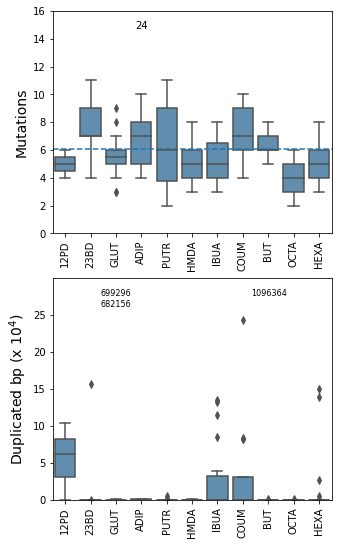

In [9]:
plt.figure(figsize=[5, 9])

color = "#5490bb"

plt.subplot(2, 1, 1)
y_max = 16
sbn.boxplot(x="Compound", y="Mutations", data=plot_df, color=color)
plt.xticks(rotation=90)
plt.ylim([0, y_max])
plt.xlabel("")
plt.ylabel("Mutations", fontsize=14)
plt.hlines(xmin=-0.5, xmax=10.5, y=plot_df.Mutations.mean(), linestyles='dashed')

# Print numbers that are too large to fit in figure
plt.text(3-0.25, 0.92 * y_max, str(int(plot_df["Mutations"]["GLUT7-7"])), size=10)

plt.subplot(2, 1, 2)
y_max = 300000-1
sbn.boxplot(x="Compound", y="Duplications", data=plot_df, color=color)
plt.xticks(rotation=90)
plt.ylim([0, y_max])
plt.xlabel("")

# Print numbers that are too large to fit in figure
plt.text(2-0.59, 0.87 * y_max, str(int(plot_df["Duplications"]["23BD4-4"])), size=8)
plt.text(2-0.59, 0.92 * y_max, str(int(plot_df["Duplications"]["23BD5-1"])), size=8)
plt.text(8-0.65, 0.92 * y_max, str(int(plot_df["Duplications"]["COUM2-3"])), size=8)
plt.ylabel("Duplicated bp (x $10^4$)", fontsize=14)
plt.yticks(range(0, 250001, 50000), ["0", "5", "10", "15", "20", "25"])

plt.savefig("../Plots/Figure 2b - Mutation distributions.svg", transparent=True)

None

In [10]:
new_ticklabel=plot_df['Compound'].value_counts().to_dict()

for i in new_ticklabel.keys():
    new_name = i+' ('+str(new_ticklabel.get(i))+')'
    new_ticklabel.update([(i,new_name)])

In [11]:
new_ticklabel

{'GLUT': 'GLUT (24)',
 'PUTR': 'PUTR (20)',
 'COUM': 'COUM (20)',
 'BUT': 'BUT (20)',
 'HEXA': 'HEXA (20)',
 'IBUA': 'IBUA (19)',
 '23BD': '23BD (17)',
 'ADIP': 'ADIP (17)',
 'OCTA': 'OCTA (17)',
 'HMDA': 'HMDA (15)',
 '12PD': '12PD (3)'}

In [39]:
plot_df['Compound']

Strain
12PD4-6    12PD
12PD6-3    12PD
12PD6-9    12PD
23BD1-6    23BD
23BD1-9    23BD
           ... 
HEXA6-9    HEXA
HEXA7-2    HEXA
HEXA8-1    HEXA
HEXA8-2    HEXA
HEXA8-5    HEXA
Name: Compound, Length: 192, dtype: object

In [12]:
plot_df[plot_df['Duplications']!=0]['Compound'].value_counts()

ADIP    10
COUM     9
GLUT     8
HMDA     6
IBUA     6
HEXA     5
23BD     4
PUTR     4
OCTA     3
12PD     2
BUT      2
Name: Compound, dtype: int64

In [14]:
plot_df[plot_df["Duplications"]!=0]

,Mutations,Duplications,Compound
Strain,,,
12PD4-6,5.0,103691.0,12PD
12PD6-9,4.0,62672.0,12PD
23BD4-3,9.0,674.0,23BD
23BD4-4,6.0,682156.0,23BD
23BD5-1,7.0,699296.0,23BD
23BD8-2,6.0,157043.0,23BD
GLUT1-10,8.0,1425.0,GLUT
GLUT2-9,4.0,1352.0,GLUT
GLUT2-10,6.0,679.0,GLUT
